<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
pip install sklearn-lvq

In [57]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn_lvq import GlvqModel
from sklearn_lvq.utils import plot2d
from sklearn.mixture import GaussianMixture

In [84]:
df    = pd.read_csv('cluster.csv')
X = df[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11']].to_numpy()
X = df[['x1','x2']].to_numpy()

#Normalizing the data
#sc = StandardScaler()
#X = sc.fit_transform(X)
#y = sc.fit_transform(Y)

## Crea conjuntos de datos de entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=0.5,random_state=5) #

# **K-means**


In [100]:
t0 = time.time()
n_clusters = 4
k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10) # una variante MiniBatchKMeans  
k_means = k_means.fit(X_train)
t_batch = time.time() - t0
values  = k_means.cluster_centers_.squeeze()
labels  = k_means.labels_
print(labels)
#print("Centroides", k_means.cluster_centers_)
#print('Exactitud:', k_means.score(X_test))
y_pred  = k_means.predict(X_test)
print(y_pred)

[0 1 0 3 0 0 3 0 3 2 0 1 3 2 1 0 3 1 2 2 3 2 0 2 0 1 2 2 0 1 3 0 0 1 0 0 3
 2 0 2 0 1 1 3 2 3 2 3 0]
[3 1 1 1 3 2 2 2 2 1 0 1 3 1 3 1 1 3 2 3 0 3 2 1 1 2 3 3 3 0 2 0 3 1 1 3 3
 3 2 1 1 1 3 2 0 0 0 2 1 2]


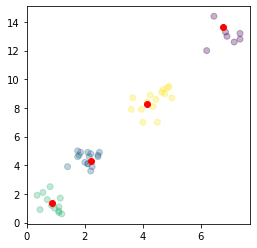

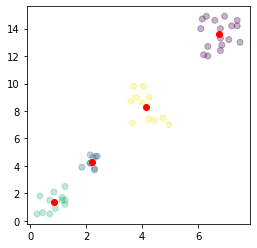

In [101]:
plt.figure(figsize=(4, 4))
for k in k_means.cluster_centers_:
    x = k[0] ; y = k[1]
    plt.plot(x,y,"o",color="red",)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, alpha=0.3)
plt.show()

plt.figure(figsize=(4, 4))
for k in k_means.cluster_centers_:
    x = k[0] ; y = k[1]
    plt.plot(x,y,"o",color="red",)
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, alpha=0.3)
plt.show()

# **LVQ**

In [61]:
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_rslvq.html
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/index.html
#https://mrnuggelz.github.io/sklearn-lvq/modules/generated/sklearn_lvq.GlvqModel.html#sklearn_lvq.GlvqModel
#https://mrnuggelz.github.io/sklearn-lvq/auto_examples/plot_glvq.html#sphx-glr-auto-examples-plot-glvq-py
print('GLVQ:')
#nb_ppc = 100
#toy_data = np.append(
#    np.random.multivariate_normal([0, 0], np.eye(2) / 2, size=nb_ppc),
#    np.random.multivariate_normal([5, 0], np.eye(2) / 2, size=nb_ppc), axis=0)
#toy_label = np.append(np.zeros(nb_ppc), np.ones(nb_ppc), axis=0)

glvq = GlvqModel()
glvq.fit(X_train, labels)
plot2d(glvq, values, labels, 1, 'glvq')

print('classification accuracy:', glvq.score(values, labels))
plt.show()

GLVQ:


ValueError: ignored

# **GaussianMixture**

In [ ]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
gm = GaussianMixture(n_components=2, random_state=0).fit(X_train)
gm.means_ 
xpred = gm.predict(X_test)